## First What is BERT?

BERT stands for Bidirectional Encoder Representations from Transformers. The name itself gives us several clues to what BERT is all about.

BERT architecture consists of several Transformer encoders stacked together. Each Transformer encoder encapsulates two sub-layers: a self-attention layer and a feed-forward layer.

### There are two different BERT models:

- BERT base, which is a BERT model consists of 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.

- BERT large, which is a BERT model consists of 24 layers of Transformer encoder,16 attention heads, 1024 hidden size, and 340 parameters.



BERT Input and Output
BERT model expects a sequence of tokens (words) as an input. In each sequence of tokens, there are two special tokens that BERT would expect as an input:

- [CLS]: This is the first token of every sequence, which stands for classification token.
- [SEP]: This is the token that makes BERT know which token belongs to which sequence. This special token is mainly important for a next sentence prediction task or question-answering task. If we only have one sequence, then this token will be appended to the end of the sequence.


It is also important to note that the maximum size of tokens that can be fed into BERT model is 512. If the tokens in a sequence are less than 512, we can use padding to fill the unused token slots with [PAD] token. If the tokens in a sequence are longer than 512, then we need to do a truncation.

And that’s all that BERT expects as input.

BERT model then will output an embedding vector of size 768 in each of the tokens. We can use these vectors as an input for different kinds of NLP applications, whether it is text classification, next sentence prediction, Named-Entity-Recognition (NER), or question-answering.


------------

**For a text classification task**, we focus our attention on the embedding vector output from the special [CLS] token. This means that we’re going to use the embedding vector of size 768 from [CLS] token as an input for our classifier, which then will output a vector of size the number of classes in our classification task.

-----------------------

![Imgur](https://imgur.com/NpeB9vb.png)

-------------------------

# Topic Modeling arXiv Abstracts

BERTopic is a topic modeling technique that leverages 🤗 transformers and class-based-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

BERTopic supports guided, (semi-) supervised, and dynamic topic modeling. It even supports visualizations similar to LDAvis!

![](2022-09-27-04-09-00.png)

BERTopic generates document embedding with pre-trained transformer-based language models, clusters these embeddings, and finally, generates topic representations with the class-based TF-IDF procedure. 

---------------------

## Three main algorithm components

**Embed Documents:** Extract document embeddings with Sentence Transformers. Since the data we are working with are article titles, we will need to obtain sentence embeddings, which BERTopic lets us choose conveniently, from among many sentence transformer model.

**Cluster Documents:** Create groups of similar documents with UMAP (to reduce the dimensionality of embeddings) and HDBSCAN (to identify and cluster semantically similar documents)

**Create Topic Representation**: Extract and reduce topics with c-TF-IDF (class-based term frequency, inverse document frequency). 

TF-IDF allows for comparing the importance of words between documents by computing the frequency of a word in a given document and also the measure of how prevalent the word is in the entire corpus. 

Now, if we instead treat all documents in a single cluster as a single document and then perform TF-IDF, the result would be importance scores for words within a cluster. The more important words are within a cluster, the more representative they are of that topic. Therefore, we can obtain keyword-based descriptions for each topic! This is super powerful when it comes to inferring meaning from the groupings yielded by any unsupervised clustering technique.

![](2022-09-27-04-06-30.png)

c-TF-IDF formula: the frequency of each word t is extracted for each class i and divided by the total number of words w. The average number of words per class m is divided by the total frequency of word t across all n classes.


### [Dataset Link](https://zdataset.com/free-dataset/arxiv-dataset/)

In [ ]:
!pip install bertopic -q

In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 

In [ ]:
data_file = '../input/arxiv/arxiv-metadata-oai-snapshot.json'

## First use dask to read the data and get some basic infor

In [ ]:
import dask.bag as db
import json

docs_dask = db.read_text(data_file).map(json.loads)

docs_dask.count().compute()

In [ ]:
# Top Submitters
docs_dask.map(lambda x: x['submitter']).frequencies(sort = True).topk(10, key=1).compute()

## Prepare Data

In [2]:
import json

# https://arxiv.org/help/api/user-manual
category_map = {'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'astro-ph.HE': 'High Energy Astrophysical Phenomena',
'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
'astro-ph.SR': 'Solar and Stellar Astrophysics',
'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
'cond-mat.mtrl-sci': 'Materials Science',
'cond-mat.other': 'Other Condensed Matter',
'cond-mat.quant-gas': 'Quantum Gases',
'cond-mat.soft': 'Soft Condensed Matter',
'cond-mat.stat-mech': 'Statistical Mechanics',
'cond-mat.str-el': 'Strongly Correlated Electrons',
'cond-mat.supr-con': 'Superconductivity',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'econ.EM': 'Econometrics',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory'}

(144460, 144460, 144460, 144460)

Json files in the dataset are huge. Sadly, python has certain memory problems when loading huge json files.
As a result, I read this file using `yield` and get necessary information from in in the loop.


The key `journal-ref` comes like this

### "journal-ref":string"Phys.Rev.D76:013009,2007"

In [ ]:
def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line

### Print the very first data point

In [ ]:
metadata = get_metadata()

for paper in metadata:
    for k, v in json.loads(paper).items():
        print(f'{k}: {v}')
    break

## Extracting all abstracts between 2000 and 2021, their titles and the years in which they were published.

In [ ]:
titles = []
abstracts = []
years = []
categories = []
metadata = get_metadata()
for paper in metadata:
    paper_dict = json.loads(paper)
    ref = paper_dict.get('journal-ref')
    try:
        year = int(ref[-4:]) 
        if 2000 < year <= 2021:
            categories.append(category_map[paper_dict.get('categories').split(" ")[0]])
            years.append(year)
            titles.append(paper_dict.get('title'))
            abstracts.append(paper_dict.get('abstract'))
    except:
        pass 

len(titles), len(abstracts), len(years), len(categories)

## Train BERTTopic Model

-------------
#### `all-mpnet-base-v2` model which 420MB Model

This is a sentence-transformers model: It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

## fit_transform(documents, embeddings=None, y=None) ¶

https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.fit_transform


Fit the models on a collection of documents, generate topics, and return the docs with topics

Parameters:


documents	List[str]	A list of documents to fit on

embeddings	np.ndarray	Pre-trained document embeddings. These can be used instead of the sentence-transformer model

y	Union[List[int], np.ndarray]	The target class for (semi)-supervised modeling. Use -1 if no class for a specific instance is specified.

None

In [3]:
from bertopic import BERTopic

topic_model = BERTopic(verbose=True, embedding_model="all-mpnet-base-v2", min_topic_size=50)

topics, _ = topic_model.fit_transform(abstracts); 


# topic_model = BERTopic(verbose=True, embedding_model="paraphrase-MiniLM-L12-v2", min_topic_size=50)



  0%|          | 0.00/123M [00:00<?, ?B/s]

Batches:   0%|          | 0/4515 [00:00<?, ?it/s]

2021-06-07 05:36:33,893 - BERTopic - Transformed documents to Embeddings
2021-06-07 05:39:04,939 - BERTopic - Reduced dimensionality with UMAP
2021-06-07 05:39:22,699 - BERTopic - Clustered UMAP embeddings with HDBSCAN


203

**NOTE**: BERTopic is stochastic since it uses UMAP as one of its dependencies so the results may differ between runs. 

## Topic Representation

In [4]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name
0,-1,71471,-1_theory_gauge_quark_stars
1,0,4465,0_graphene_spin_magnetic_electron
2,1,3821,1_mathbb_algebras_algebra_mathcal
3,2,3242,2_holes_hawking_gravity_schwarzschild
4,3,2280,3_cosmological_universe_gravity_cosmology
5,4,2041,4_channel_network_wireless_networks
6,5,1935,5_higgs_boson_bosons_mssm
7,6,1917,6_learning_segmentation_training_3d
8,7,1767,7_dark_universe_cosmological_energy
9,8,1720,8_matter_annihilation_lightest_positron


In [ ]:
topic_model.get_topic_freq().head()

### Here the outliers are labelled as -1 in the topic column

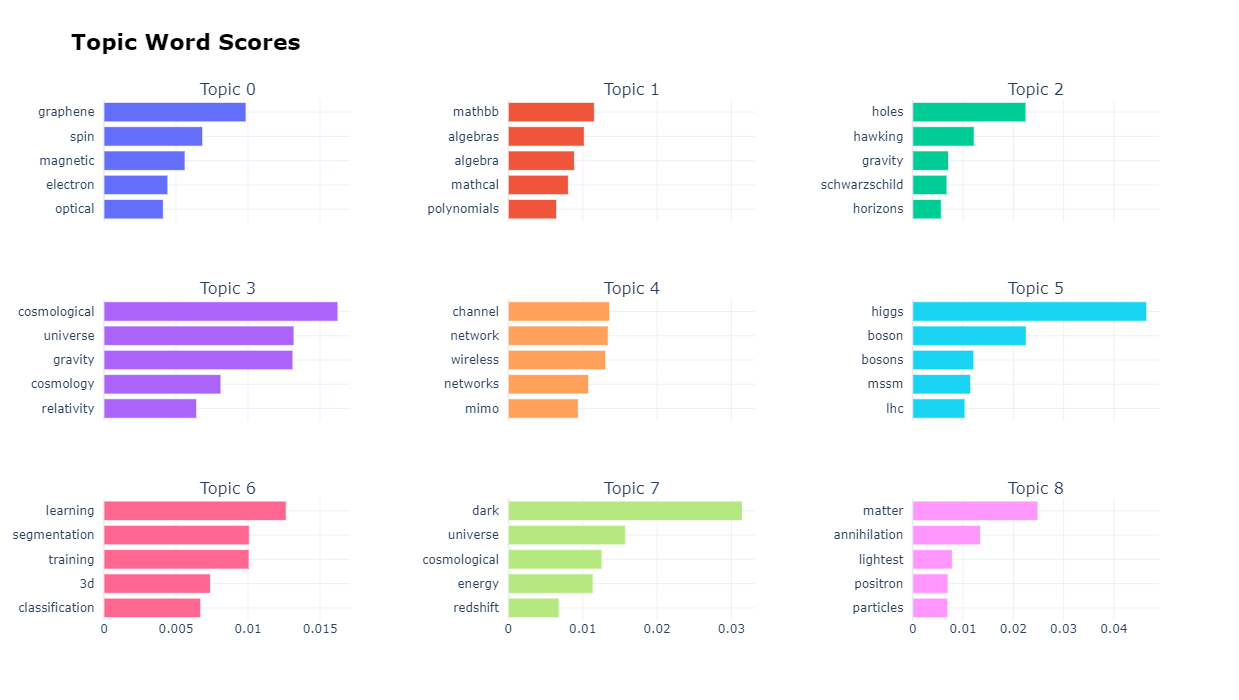

In [5]:
topic_model.visualize_barchart(top_n_topics=9, height=700)

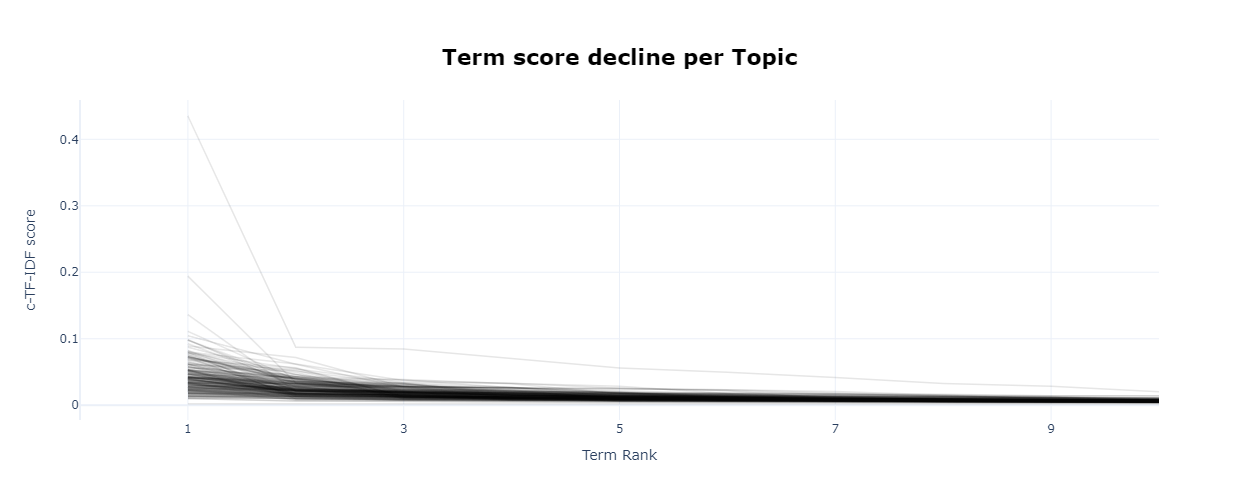

In [6]:
topic_model.visualize_term_rank()

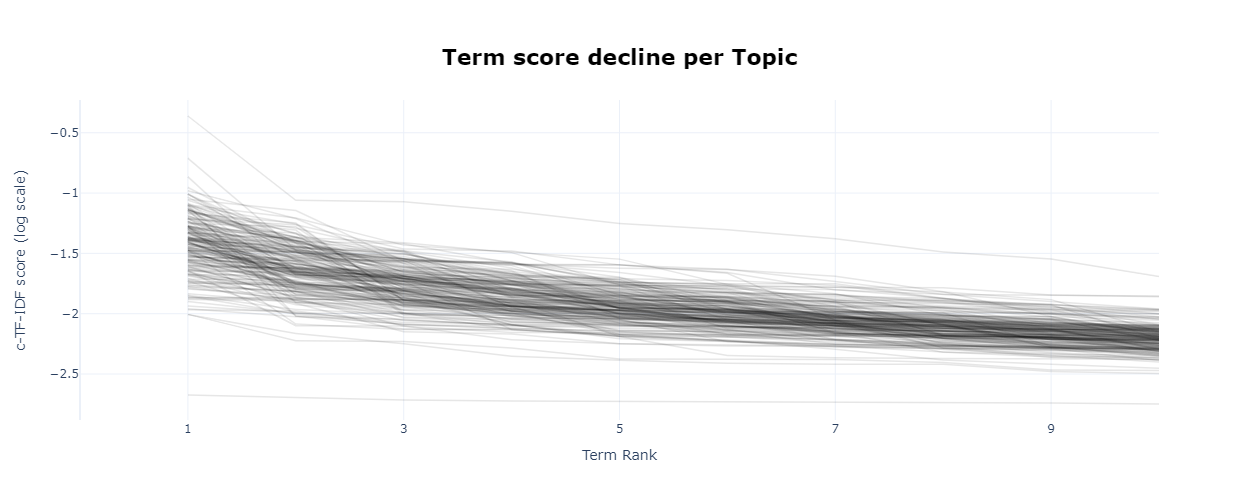

In [7]:
topic_model.visualize_term_rank(log_scale=True)

Using the elbow method, it seems that 3 words per topic are sufficient in representing the topic well. 

## Topic Relationships

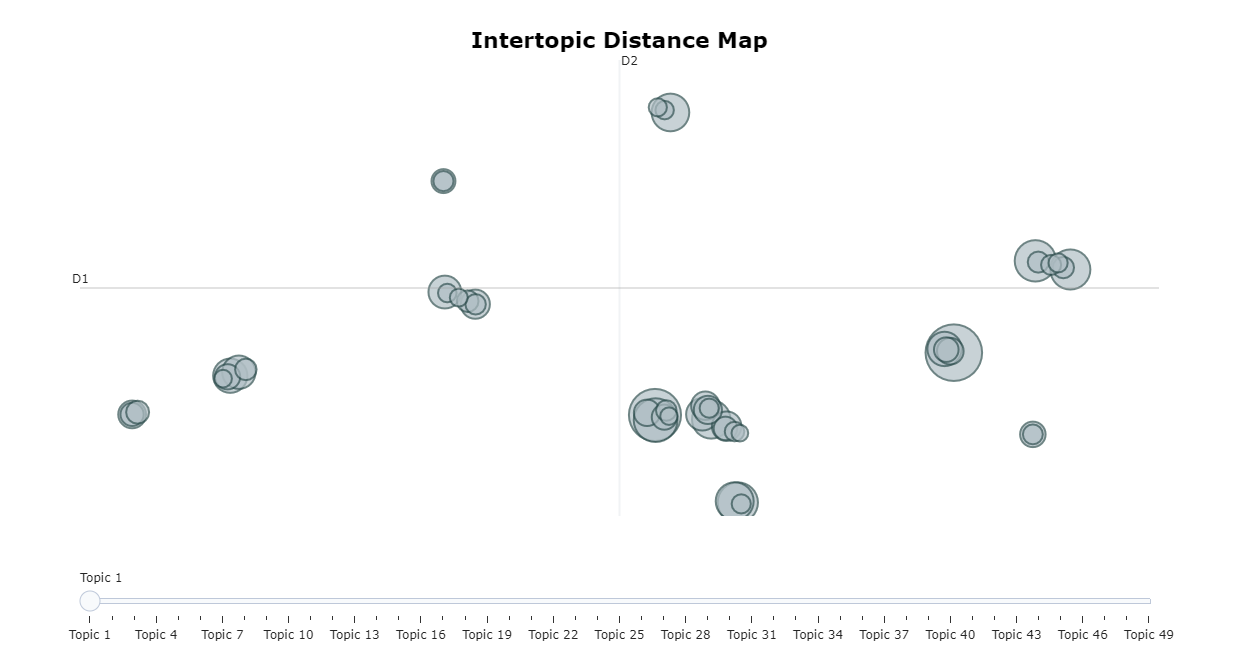

In [8]:
topic_model.visualize_topics(top_n_topics=50)

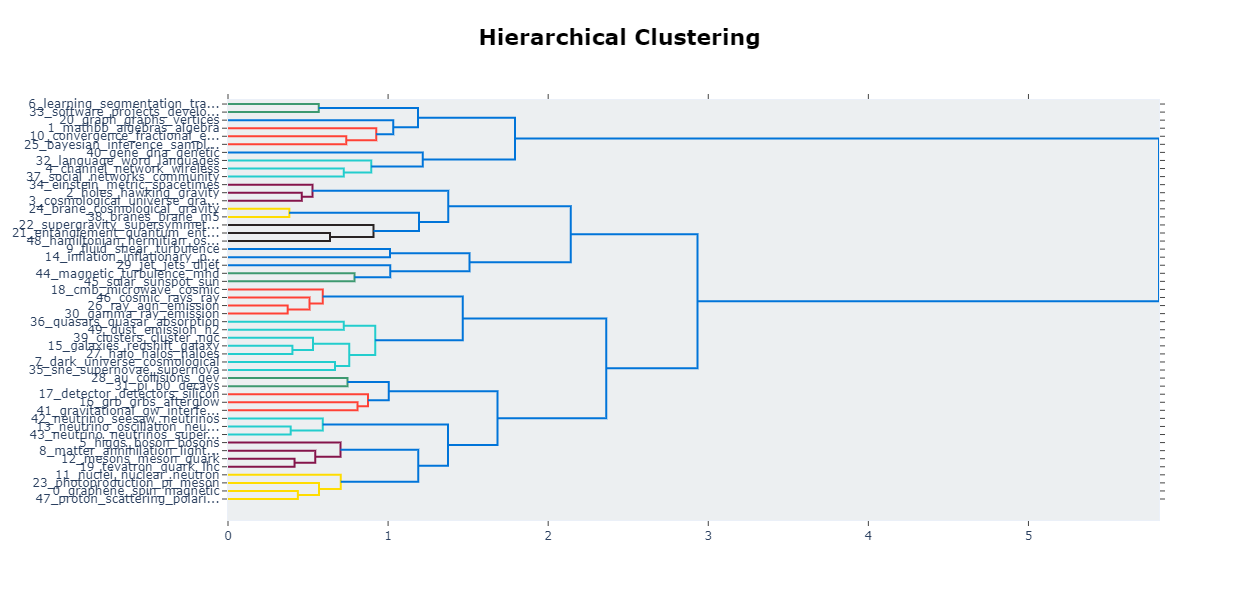

In [18]:
topic_model.visualize_hierarchy(top_n_topics=50, width=800)

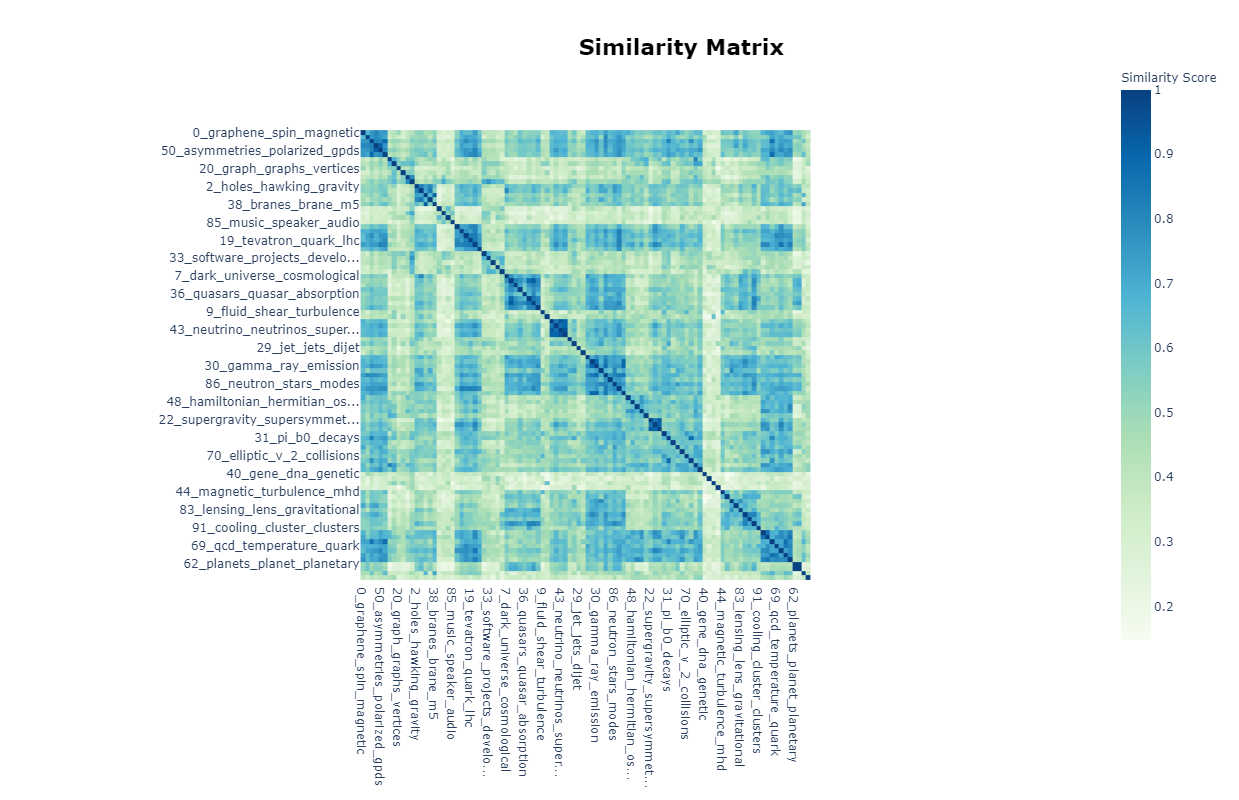

In [10]:
topic_model.visualize_heatmap(n_clusters=20, top_n_topics=100)

In [11]:
topics_over_time = topic_model.topics_over_time(abstracts, topics, 10)

21it [04:56, 14.10s/it]


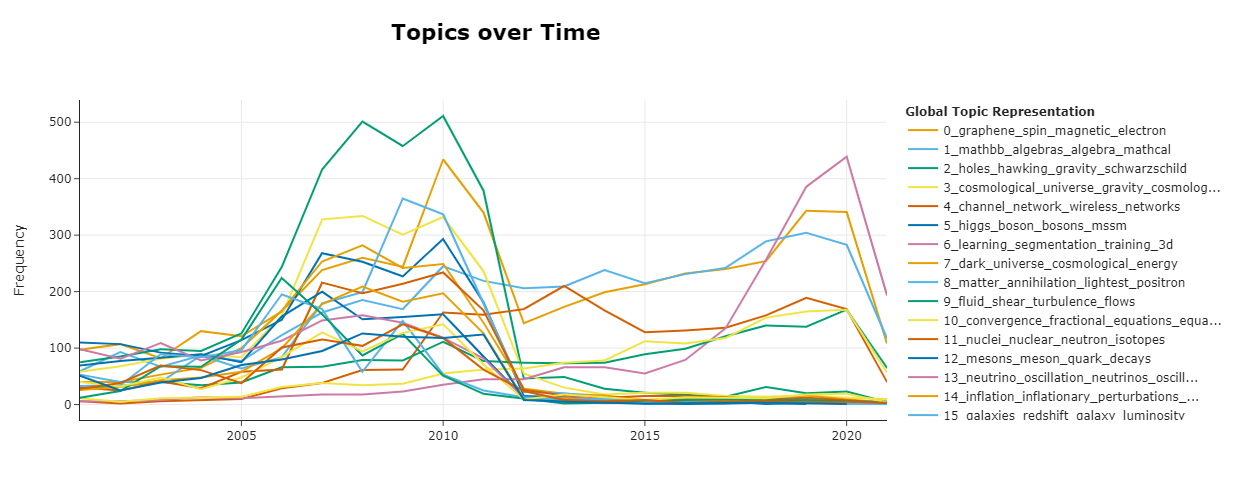

In [16]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20, width=900, height=500)

## Topics per Class

### topics_per_class(docs, classes, global_tuning=True) ¶

Create topics per class

To create the topics per class, BERTopic needs to be already fitted once. From the fitted models, the c-TF-IDF representations are calculate at each class c. Then, the c-TF-IDF representations at class c are averaged with the global c-TF-IDF representations in order to fine-tune the local representations.

In [13]:
topics_per_class = topic_model.topics_per_class(abstracts, classes=categories)

148it [04:01,  1.63s/it]


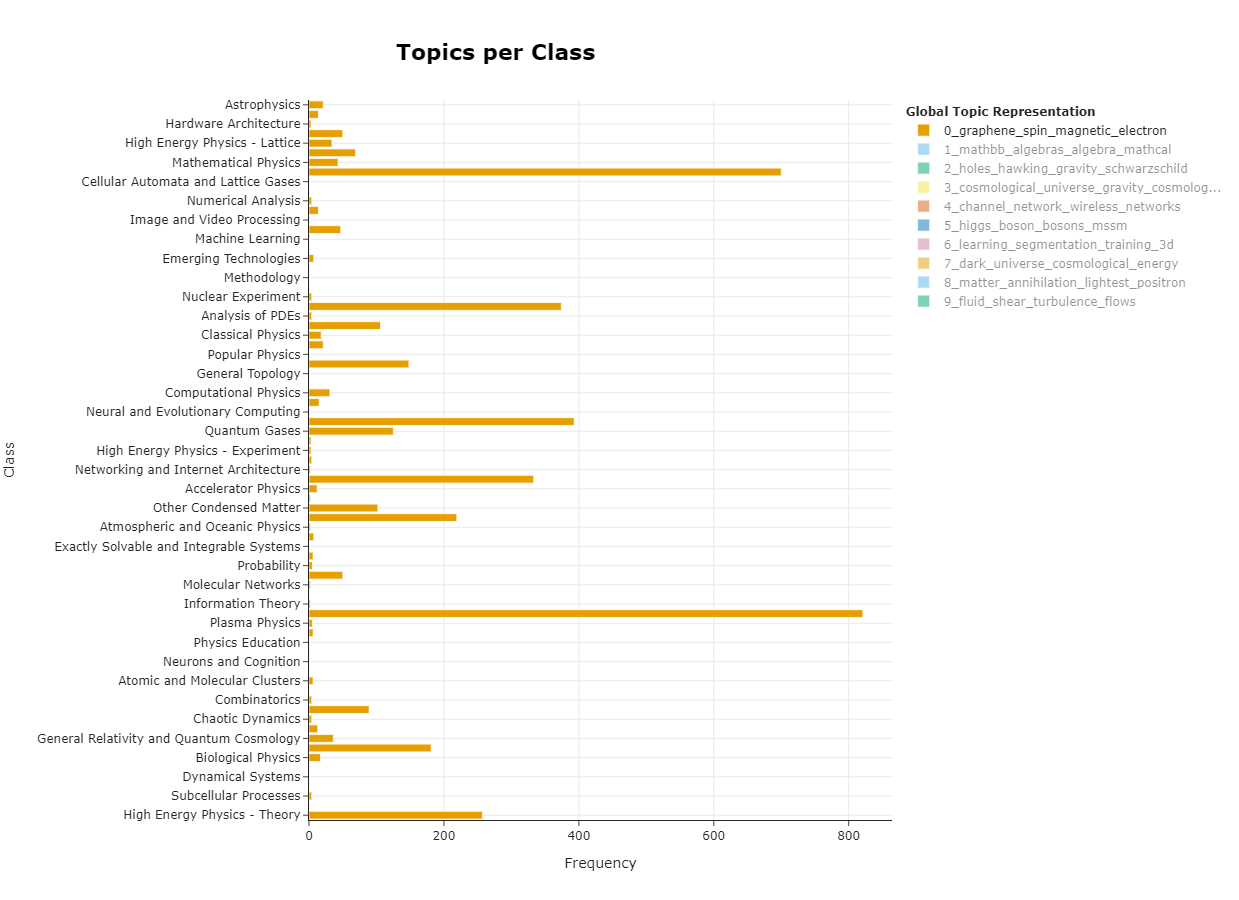

In [17]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10, width=900)